## 1. Import all the libraries needed during the analysis

In [104]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime



## 2. Data Preparation and Cleaning

In [105]:
#Loading dataset

df_marathon = pd.read_csv("./data/MarathonData.csv")

In [62]:
df_marathon.head(10)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
5,6,Prague17,David Pecina,M40,42.2,13.612903,NaN,1.32,2.78,A
6,7,Prague17,Tomas Drabek,M40,89.0,12.594340,NaN,1.38,2.81,A
7,8,Prague17,Jan Rada,M45,106.0,12.694611,NaN,1.41,2.84,A
8,9,Prague17,Tomas Drabek,MAM,70.0,13.770492,ciclista 1h,1.38,2.83,A
9,10,Prague17,martin ?indel ?,M45,84.2,13.365079,NaN,1.35,2.86,A


In [63]:
df_marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [64]:
df_marathon.isnull().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64

In [106]:
df_marathon["CrossTraining"].unique()

# It is not necessary to get rid of the CrossTraining column (74 null values) because it is an optional column showing if the athletes were doing any cross trainings

array([nan, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 5h',
       'ciclista 3h'], dtype=object)

In [107]:
# Replacing empty values in the CrossTraining column with nocrosstr

df_marathon["CrossTraining"].fillna("nocrosstr", inplace = True)

/var/folders/r2/m617yygs46q4sg5bxxgr4c6r0000gn/T/ipykernel_73741/392539542.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_marathon["CrossTraining"].fillna("nocrosstr", inplace = True)


In [108]:
df_marathon["Category"].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', nan, 'WAM'], dtype=object)

In [109]:
df_marathon["Category"].isna().sum()

np.int64(6)

In [110]:
#Removing rows with empty value in the Category column
df_marathon.dropna(how="any", inplace=True)

In [111]:
df_marathon['Category'].value_counts()

Category
MAM    40
M45    15
M40    15
M50     4
WAM     4
M55     3
Name: count, dtype: int64

In [112]:
# Creating a new column "MaxGroupAge" to translate the info in the category column into a more readable format

df_marathon.loc[df_marathon['Category'] == 'MAM', 'MaxGroupAge'] = 40
df_marathon.loc[df_marathon['Category'] == 'M40', 'MaxGroupAge'] = 45
df_marathon.loc[df_marathon['Category'] == 'M45', 'MaxGroupAge'] = 50
df_marathon.loc[df_marathon['Category'] == 'M50', 'MaxGroupAge'] = 55
df_marathon.loc[df_marathon['Category'] == 'M55', 'MaxGroupAge'] = 60
df_marathon.loc[df_marathon['Category'] == 'WAM', 'MaxGroupAge'] = 40

In [113]:
df_marathon.head(15)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,MaxGroupAge
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,nocrosstr,1.16,2.37,A,40.0
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,nocrosstr,1.23,2.59,A,40.0
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,nocrosstr,1.30,2.66,A,40.0
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,nocrosstr,1.32,2.68,A,50.0
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,nocrosstr,1.36,2.74,A,40.0
5,6,Prague17,David Pecina,M40,42.2,13.612903,nocrosstr,1.32,2.78,A,45.0
6,7,Prague17,Tomas Drabek,M40,89.0,12.594340,nocrosstr,1.38,2.81,A,45.0
7,8,Prague17,Jan Rada,M45,106.0,12.694611,nocrosstr,1.41,2.84,A,50.0
8,9,Prague17,Tomas Drabek,MAM,70.0,13.770492,ciclista 1h,1.38,2.83,A,40.0
9,10,Prague17,martin ?indel ?,M45,84.2,13.365079,nocrosstr,1.35,2.86,A,50.0


In [114]:
df_marathon['MaxGroupAge'] = df_marathon['MaxGroupAge'].astype(int)

In [115]:
# Replacing empty values in the Wall21 column with NaN and converting the column to float instead of object

df_marathon['Wall21'] = df_marathon['Wall21'].replace("-", np.nan)

df_marathon['Wall21'] = df_marathon['Wall21'].astype(float)

In [116]:
# The Name column seems to have weird caracters. Checking specific rows with issues
non_ascii_names = df_marathon[df_marathon['Name'].str.contains(r'[^\x00-\x7F]', na=False)]
print(non_ascii_names)

    id  Marathon               Name Category  km4week    sp4week  \
3    4  Prague17      Daniel Or lek      M45    137.5  12.258544   
4    5  Prague17       Luk ? Mr zek      MAM     84.6  13.945055   
9   10  Prague17    martin ?indel ?      M45     84.2  13.365079   
12  13  Prague17       Tom ? K?e?ek      M45     53.5  14.078947   
13  14  Prague17        Ji?، Polcar      M40     84.4  13.836066   
16  17  Prague17     Jپrgen Steiner      M55    112.3  12.594393   
19  20  Prague17    Vlastimil Lys k      MAM     76.7   8.031414   
20  21  Prague17       Radek Dvo? k      MAM     94.5  11.886792   
21  22  Prague17      Jind?ich Lisى      M40     67.3  13.239344   
29  30  Prague17   Jaroslav Jur sek      M50    104.9  11.720670   
36  37  Prague17      Luk ? Kozubik      MAM     50.1  12.170040   
52  53  Prague17      Luk ? Charv t      M40    121.7   9.907734   
61  62  Prague17  Jaroslav Valeri n      MAM     54.1  11.116438   
77  78  Prague17       Luk ? Pe?iva      MAM    

In [117]:
# Force UTF-8 encoding on the Name column
df_marathon['Name'] = df_marathon['Name'].apply(lambda x: x.encode('utf-8', errors='replace').decode('utf-8') if isinstance(x, str) else x)

In [118]:
df_marathon.head(5)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,MaxGroupAge
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,nocrosstr,1.16,2.37,A,40
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,nocrosstr,1.23,2.59,A,40
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,nocrosstr,1.30,2.66,A,40
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,nocrosstr,1.32,2.68,A,50
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,nocrosstr,1.36,2.74,A,40


In [119]:
# Checking duplicates
df_marathon.duplicated().sum()


np.int64(0)

In [120]:
# Checking if all the data in the dataset is from the same marathon (Prague17)
is_all_same = (df_marathon['Marathon'] == 'Prague17').all()
print(is_all_same)

True


In [121]:
df_marathon.describe()

,id,km4week,sp4week,Wall21,MarathonTime,MaxGroupAge
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,43.283951,62.650617,149.305494,1.630617,3.306914,44.259259
std,25.492271,26.844590,1234.766228,0.210490,0.380617,5.596378
min,1.000000,17.900000,8.031414,1.160000,2.370000,40.000000
25%,21.000000,45.200000,11.566474,1.450000,2.990000,40.000000
50%,43.000000,59.100000,12.163424,1.620000,3.320000,40.000000
75%,65.000000,78.200000,12.878981,1.760000,3.590000,50.000000
max,87.000000,137.500000,11125.000000,2.050000,3.980000,60.000000


## 3. Columns Description

Column description to decide if I need to transform any more columns: 

| Column/Variable   | Description                                                                                           | Type       |
| ------------------|-------------------------------------------------------------------------------------------------------|------------|
| Marathon          | Tells us the name of the Marathon (Prague17 for all entries)                                         | Categorical |
| Name              | Name of the athlete                                                                                  | Categorical |
| Category          | Sex and age group of a runner                                                                        | Categorical |
| km4week           | Average number of kilometers run per week in the last 4 weeks before the marathon, marathon included | Numerical   |
| sp4week           | Represents a measure of speed, but its values **don’t match the common unit of minutes per kilometer**| Numerical   |
| CrossTraining     | Shows if an athlete is also a cross trainer in other disciplines                                     | Categorical |
| Wall21            | Times (**in hours**) for the first half marathon                                                     | Numerical   |
| MarathonTime      | Marathon finish times in **hours and fractions of hours**                                            | Numerical   |
| CATEGORY          | Ancillary field. A = results under 3h, B = between 3h-3h20m, C = between 3h20m-3h40m, D = between 3h40-4h | Categorical |
| MaxGroupAge       | Based on the category column, shows the max age of the corresponding group                           | Numerical   |

## 4. Data Transformation & Validation

In [122]:
df_marathon.describe()

,id,km4week,sp4week,Wall21,MarathonTime,MaxGroupAge
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,43.283951,62.650617,149.305494,1.630617,3.306914,44.259259
std,25.492271,26.844590,1234.766228,0.210490,0.380617,5.596378
min,1.000000,17.900000,8.031414,1.160000,2.370000,40.000000
25%,21.000000,45.200000,11.566474,1.450000,2.990000,40.000000
50%,43.000000,59.100000,12.163424,1.620000,3.320000,40.000000
75%,65.000000,78.200000,12.878981,1.760000,3.590000,50.000000
max,87.000000,137.500000,11125.000000,2.050000,3.980000,60.000000


Wall21 and MarathonTime values have times in hours and fractions of hours which might be confusing for our audience. Also, the sp4week column appears to represent a measure of speed, but its values don’t match the common unit of minutes per kilometer. 
Instead, these values seem more aligned with kilometers per hour (km/h), where higher values indicate faster speeds.
I decided to convert them to a more common format, i.e. hours and minutes

**Marathon Time**

The times are likely recorded as decimal hours. For example:

•	2.90 hours means **2 hours and 0.90 of an hour**, which is approximately **2 hours and 54 minutes**.

In [123]:
# Converting All Values of the Marathon Time column to Hours and Minutes

converted_times = []
for time in df_marathon['MarathonTime']:
    h = int(time)  # Extract integer hours
    min = round((time - h) * 60)  # Convert fractional part to minutes
    converted_times.append(f"{h}h {min}min")

# Add the converted times as a new column to the DataFrame
df_marathon['MarathonTime_hours_mins'] = converted_times

In [124]:
df_marathon.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,MaxGroupAge,MarathonTime_hours_mins
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,nocrosstr,1.16,2.37,A,40,2h 22min
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,nocrosstr,1.23,2.59,A,40,2h 35min
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,nocrosstr,1.30,2.66,A,40,2h 40min
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,nocrosstr,1.32,2.68,A,50,2h 41min
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,nocrosstr,1.36,2.74,A,40,2h 44min


**Marathon Time Outliers**


- Using the Interquartile Rage (IQR)

In [125]:
# Calculate Q1, Q3, and IQR
Q1 = df_marathon['MarathonTime'].quantile(0.25)
Q3 = df_marathon['MarathonTime'].quantile(0.75)
IQR = Q3 - Q1

# Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_marathon[(df_marathon['MarathonTime'] < lower_bound) | (df_marathon['MarathonTime'] > upper_bound)]
print("Outliers:")
print(outliers)

# Print bounds for reference
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Outliers:
Empty DataFrame
Columns: [id, Marathon, Name, Category, km4week, sp4week, CrossTraining, Wall21, MarathonTime, CATEGORY, MaxGroupAge, MarathonTime_hours_mins]
Index: []
Lower bound: 2.0900000000000007, Upper bound: 4.489999999999999


The result indicates that there are no outliers in the MarathonTime column based on the IQR method.

This means:

-	All MarathonTime values fall within the range [2.09, 4.49].
-	No values are below 2.09 or above 4.49.

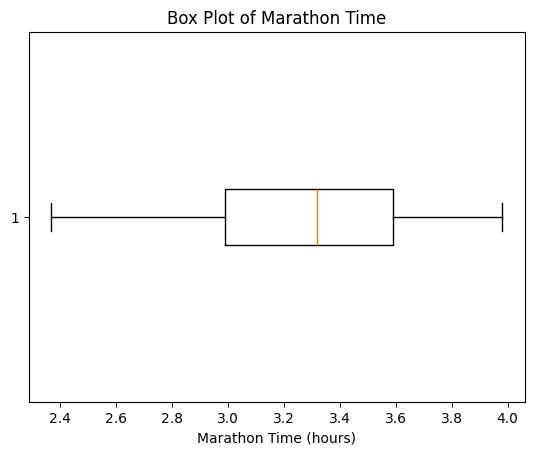

In [126]:
# Create a box plot to visually detect outliers
plt.boxplot(df_marathon['MarathonTime'], vert=False)
plt.title("Box Plot of Marathon Time")
plt.xlabel("Marathon Time (hours)")
plt.show()

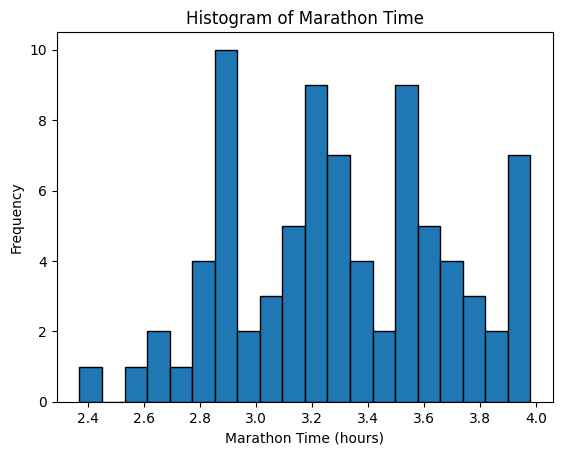

In [127]:
# Create a histogram
plt.hist(df_marathon['MarathonTime'], bins=20, edgecolor='black')
plt.title("Histogram of Marathon Time")
plt.xlabel("Marathon Time (hours)")
plt.ylabel("Frequency")
plt.show()

**Wall21**

We can introduce a new column Wall 21 Ratio (based on the Ideal Marathon Time)

This new column is to represent how evenly a runner splits their first and second halves of a marathon

In [128]:
# Convert Wall21 to readable format (hours and minutes)
converted_wall21 = []
for time in df_marathon['Wall21'].dropna():
    h = int(time)  # Extract integer hours
    mins = round((time - h) * 60)  # Convert fractional hours to minutes
    converted_wall21.append(f"{h}h {mins}min")

# Calculate ideal marathon times (Wall21 * 2) for valid values
df_marathon['Ideal Marathon Time (Decimal Hours)'] = df_marathon['Wall21'] * 2

# Add the readable format back to the DataFrame (aligning indexes)
df_marathon['Wall21_hours_min'] = pd.Series(converted_wall21).reindex(df_marathon.index, fill_value=np.nan)


df_marathon.sample(10)


,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,MaxGroupAge,MarathonTime_hours_mins,Ideal Marathon Time (Decimal Hours),Wall21_hours_min
38,39,Prague17,Brian Parkinson,MAM,64.7,13.294521,nocrosstr,1.50,3.24,B,40,3h 14min,3.00,1h 35min
62,63,Prague17,Ale? Kuchynka,M45,48.8,11.665339,nocrosstr,1.66,3.56,C,50,3h 34min,3.32,1h 56min
27,28,Prague17,Pavel Hlo?ek,MAM,82.4,11.771429,nocrosstr,1.52,3.14,B,40,3h 8min,3.04,1h 30min
35,36,Prague17,Jan Kervitcer,MAM,50.1,11.881423,nocrosstr,1.62,3.22,B,40,3h 13min,3.24,1h 37min
86,87,Prague17,Pavel ?imek,M40,17.9,10.848485,ciclista 5h,2.05,3.98,D,45,3h 59min,4.10,NaN
26,27,Prague17,Cat Simpson,WAM,129.6,12.188088,nocrosstr,1.54,3.12,B,40,3h 7min,3.08,1h 31min
47,48,Prague17,Miguel Escribano,M45,39.6,12.247423,nocrosstr,1.67,3.35,B,50,3h 21min,3.34,1h 38min
22,23,Prague17,Carlos Valladares Calvo,M40,59.4,12.638298,nocrosstr,1.50,3.05,B,45,3h 3min,3.00,1h 30min
7,8,Prague17,Jan Rada,M45,106.0,12.694611,nocrosstr,1.41,2.84,A,50,2h 50min,2.82,1h 25min
12,13,Prague17,Tom ? K?e?ek,M45,53.5,14.078947,ciclista 4h,1.37,2.88,A,50,2h 53min,2.74,1h 22min


In [129]:
# Calculate Wall21 Ratio

# Calculate the Second Half Time
df_marathon['Second Half Time'] = df_marathon['MarathonTime'] - df_marathon['Wall21']

# Calculate the Wall21 Ratio
df_marathon['Wall21 Ratio'] = df_marathon['Second Half Time'] / df_marathon['Wall21']


print(df_marathon[['Wall21', 'MarathonTime', 'Second Half Time', 'Wall21 Ratio']])

    Wall21  MarathonTime  Second Half Time  Wall21 Ratio
0     1.16          2.37              1.21      1.043103
1     1.23          2.59              1.36      1.105691
2     1.30          2.66              1.36      1.046154
3     1.32          2.68              1.36      1.030303
4     1.36          2.74              1.38      1.014706
..     ...           ...               ...           ...
82    2.02          3.93              1.91      0.945545
83    1.94          3.93              1.99      1.025773
84    1.94          3.94              2.00      1.030928
85    2.05          3.95              1.90      0.926829
86    2.05          3.98              1.93      0.941463

[81 rows x 4 columns]


**Wall21 Ratio Outliers**

If a marathoner runs the first and second halves at the same pace, the ideal ratio (Wall21) is **1.00**.

-	For example:

-	First half: 1:30:00 (1.5 hours).

-	Second half: 1:30:00 (1.5 hours).

-	Total time: 3:00:00.

Ratios above 1.00 indicate that the runner slowed down in the second half, suggesting fatigue or hitting “the wall.” Ratios below 1.00 are uncommon and suggest the runner ran the second half faster than the first, which is rare in marathon pacing.

**Range of Values**:

•	Ratios should logically be **≥ 1.00**, as slowing down in the second half is typical.

•	Values like **1.16** are plausible and indicate a well-paced run.

•	High values (e.g., **2.05**) suggest a significant slowdown.

In [130]:
# Calculate the IQR for Wall21 Ratio
Q1 = df_marathon['Wall21 Ratio'].quantile(0.25)
Q3 = df_marathon['Wall21 Ratio'].quantile(0.75)
IQR = Q3 - Q1

# Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_marathon[(df_marathon['Wall21 Ratio'] < lower_bound) | (df_marathon['Wall21 Ratio'] > upper_bound)]

# Display results
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print("Outliers:")
print(outliers)

Lower bound: 0.8792607093505302, Upper bound: 1.1852640872101947
Outliers:
    id  Marathon               Name Category  km4week    sp4week  \
42  43  Prague17  Thanasis Kypraios      MAM     82.7  11.647887   

   CrossTraining  Wall21  MarathonTime CATEGORY  MaxGroupAge  \
42     nocrosstr    1.78          3.32        B           40   

   MarathonTime_hours_mins  Ideal Marathon Time (Decimal Hours)  \
42                3h 19min                                 3.56   

   Wall21_hours_min  Second Half Time  Wall21 Ratio  
42         1h 40min              1.54      0.865169  


Expected range for the Wall21 Ratio based on the IQR method is from 0.879 to 1.185. The Outlier is the runner with Id = 43. Possible Explanations:

    1.  Pacing Strategy:
    -   The runner may have intentionally started slow to conserve energy for the second half.
    2.  Training Effect:
    -   High mileage (km4week = 82.7 km) and a decent pace (5.15 min/km) might indicate strong endurance.
    3.  Data Error

**sp4week**

The sp4week column appears to represent a measure of speed, but its values don’t match the common unit of minutes per kilometer. Instead, these values seem more aligned with kilometers per hour (km/h), where higher values indicate faster speeds.

I'll convert it to pace (min/km) because it is the most common way of measuring the speed between the runners of all levels.


In [131]:
# Convert sp4week (km/h) to pace (min/km)
df_marathon['Pace4week (min/km)'] = 60 / df_marathon['sp4week']

df_marathon

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,MaxGroupAge,MarathonTime_hours_mins,Ideal Marathon Time (Decimal Hours),Wall21_hours_min,Second Half Time,Wall21 Ratio,Pace4week (min/km)
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,nocrosstr,1.16,2.37,A,40,2h 22min,2.32,1h 10min,1.21,1.043103,4.156627
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,nocrosstr,1.23,2.59,A,40,2h 35min,2.46,1h 14min,1.36,1.105691,4.387755
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,nocrosstr,1.30,2.66,A,40,2h 40min,2.60,1h 18min,1.36,1.046154,4.437727
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,nocrosstr,1.32,2.68,A,50,2h 41min,2.64,1h 19min,1.36,1.030303,4.894545
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,nocrosstr,1.36,2.74,A,40,2h 44min,2.72,1h 22min,1.38,1.014706,4.302600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,nocrosstr,2.02,3.93,D,60,3h 56min,4.04,NaN,1.91,0.945545,5.540000
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D,45,3h 56min,3.88,NaN,1.99,1.025773,5.922619
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,nocrosstr,1.94,3.94,D,45,3h 56min,3.88,NaN,2.00,1.030928,5.433213
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,nocrosstr,2.05,3.95,D,50,3h 57min,4.10,NaN,1.90,0.926829,5.421687


**sp4week Outliers**

Outliers in sp4week:
    id  Marathon             Name Category  km4week       sp4week  \
15  16  Prague17     David Lehnen      MAM     76.1     14.970492   
19  20  Prague17  Vlastimil Lys k      MAM     76.7      8.031414   
76  77  Prague17    Michal Karhan      MAM     40.3      8.337931   
81  82  Prague17      Nathan Khan      MAM     35.6  11125.000000   

   CrossTraining  Wall21  MarathonTime CATEGORY  MaxGroupAge  \
15     nocrosstr    1.45          2.90        A           40   
19     nocrosstr    1.41          2.94        A           40   
76   ciclista 5h    1.94          3.80        D           40   
81     nocrosstr    2.05          3.92        D           40   

   MarathonTime_hours_mins  Ideal Marathon Time (Decimal Hours)  \
15                2h 54min                                 2.90   
19                2h 56min                                 2.82   
76                3h 48min                                 3.88   
81                3h 55min                  

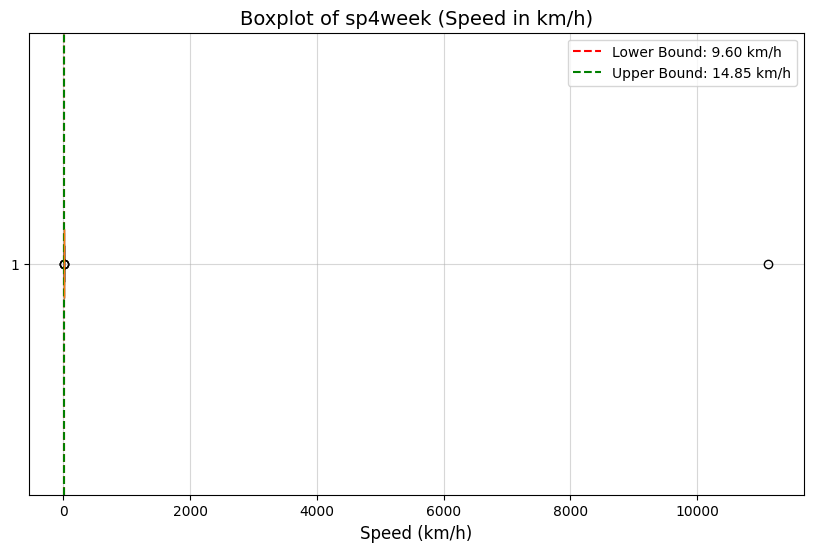

In [133]:
import matplotlib.pyplot as plt

# Calculate Q1, Q3, and IQR for the 'sp4week' column
Q1 = df_marathon['sp4week'].quantile(0.25)
Q3 = df_marathon['sp4week'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_marathon[(df_marathon['sp4week'] < lower_bound) | (df_marathon['sp4week'] > upper_bound)]

# Print the outliers
print("Outliers in sp4week:")
print(outliers)

# Visualization: Boxplot to highlight outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df_marathon['sp4week'], vert=False, patch_artist=True)
plt.title("Boxplot of sp4week (Speed in km/h)", fontsize=14)
plt.xlabel("Speed (km/h)", fontsize=12)
plt.grid(alpha=0.5)

# Highlight bounds on the plot
plt.axvline(x=lower_bound, color='red', linestyle='--', label=f"Lower Bound: {lower_bound:.2f} km/h")
plt.axvline(x=upper_bound, color='green', linestyle='--', label=f"Upper Bound: {upper_bound:.2f} km/h")
plt.legend(fontsize=10)

# Show the plot
plt.show()

Unusually High Speed (Outlier at Index 81)

	•	Runner: Nathan Khan
	•	Speed: 11125 km/h
	•	Pace: 0.005 min/km (unrealistically fast).
	•	This is likely a data entry error 

In [134]:
# Remove the outlier with 11125 km/h in the 'sp4week' column
df_marathon = df_marathon[df_marathon['sp4week'] != 11125]

# Verify removal
print("Outlier with 11125 km/h removed:", 11125 not in df_marathon['sp4week'].values)

Outlier with 11125 km/h removed: True


**km4week Outliers**

In [135]:
# Calculate Q1, Q3, and IQR for the 'km4week' column
Q1 = df_marathon['km4week'].quantile(0.25)
Q3 = df_marathon['km4week'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_km4week = df_marathon[(df_marathon['km4week'] < lower_bound) | (df_marathon['km4week'] > upper_bound)]

# Print outlier bounds and the outliers
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print("Outliers in km4week:")
print(outliers_km4week)

Lower Bound: 1.437499999999993, Upper Bound: 124.73750000000001
Outliers in km4week:
    id  Marathon           Name Category  km4week    sp4week CrossTraining  \
0    1  Prague17   Blair MORGAN      MAM    132.8  14.434783     nocrosstr   
3    4  Prague17  Daniel Or lek      M45    137.5  12.258544     nocrosstr   
26  27  Prague17    Cat Simpson      WAM    129.6  12.188088     nocrosstr   

    Wall21  MarathonTime CATEGORY  MaxGroupAge MarathonTime_hours_mins  \
0     1.16          2.37        A           40                2h 22min   
3     1.32          2.68        A           50                2h 41min   
26    1.54          3.12        B           40                 3h 7min   

    Ideal Marathon Time (Decimal Hours) Wall21_hours_min  Second Half Time  \
0                                  2.32         1h 10min              1.21   
3                                  2.64         1h 19min              1.36   
26                                 3.08         1h 31min              1

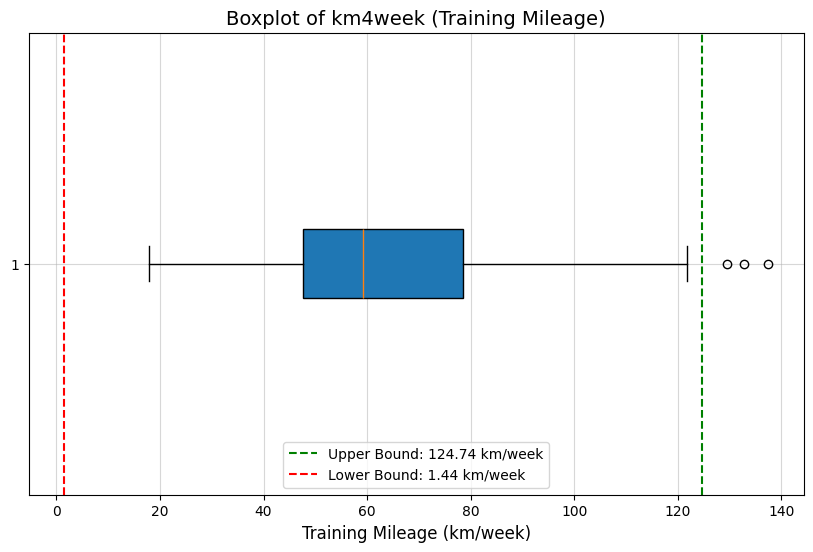

In [136]:
# Visualization: Boxplot to highlight outliers in 'km4week'
plt.figure(figsize=(10, 6))
plt.boxplot(df_marathon['km4week'], vert=False, patch_artist=True)
plt.title("Boxplot of km4week (Training Mileage)", fontsize=14)
plt.xlabel("Training Mileage (km/week)", fontsize=12)
plt.grid(alpha=0.5)

# Highlight bounds on the plot
plt.axvline(x=124.7375, color='green', linestyle='--', label="Upper Bound: 124.74 km/week")
plt.axvline(x=1.4375, color='red', linestyle='--', label="Lower Bound: 1.44 km/week")
plt.legend(fontsize=10)

# Show the plot
plt.show()

Based on their Marathon Time and Wall21 it seems like these 3 outliers might be well trained athletes and don't represent data error. 

## 5. Analysis